In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf

print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available())

False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
df = pd.read_csv("C:\\Datasets\\MNST\\fashion-mnist_train.csv")
df.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0


In [7]:
import math

math.sqrt(784)

28.0

In [9]:
X,y = df.iloc[:,1:], df.iloc[:,0]

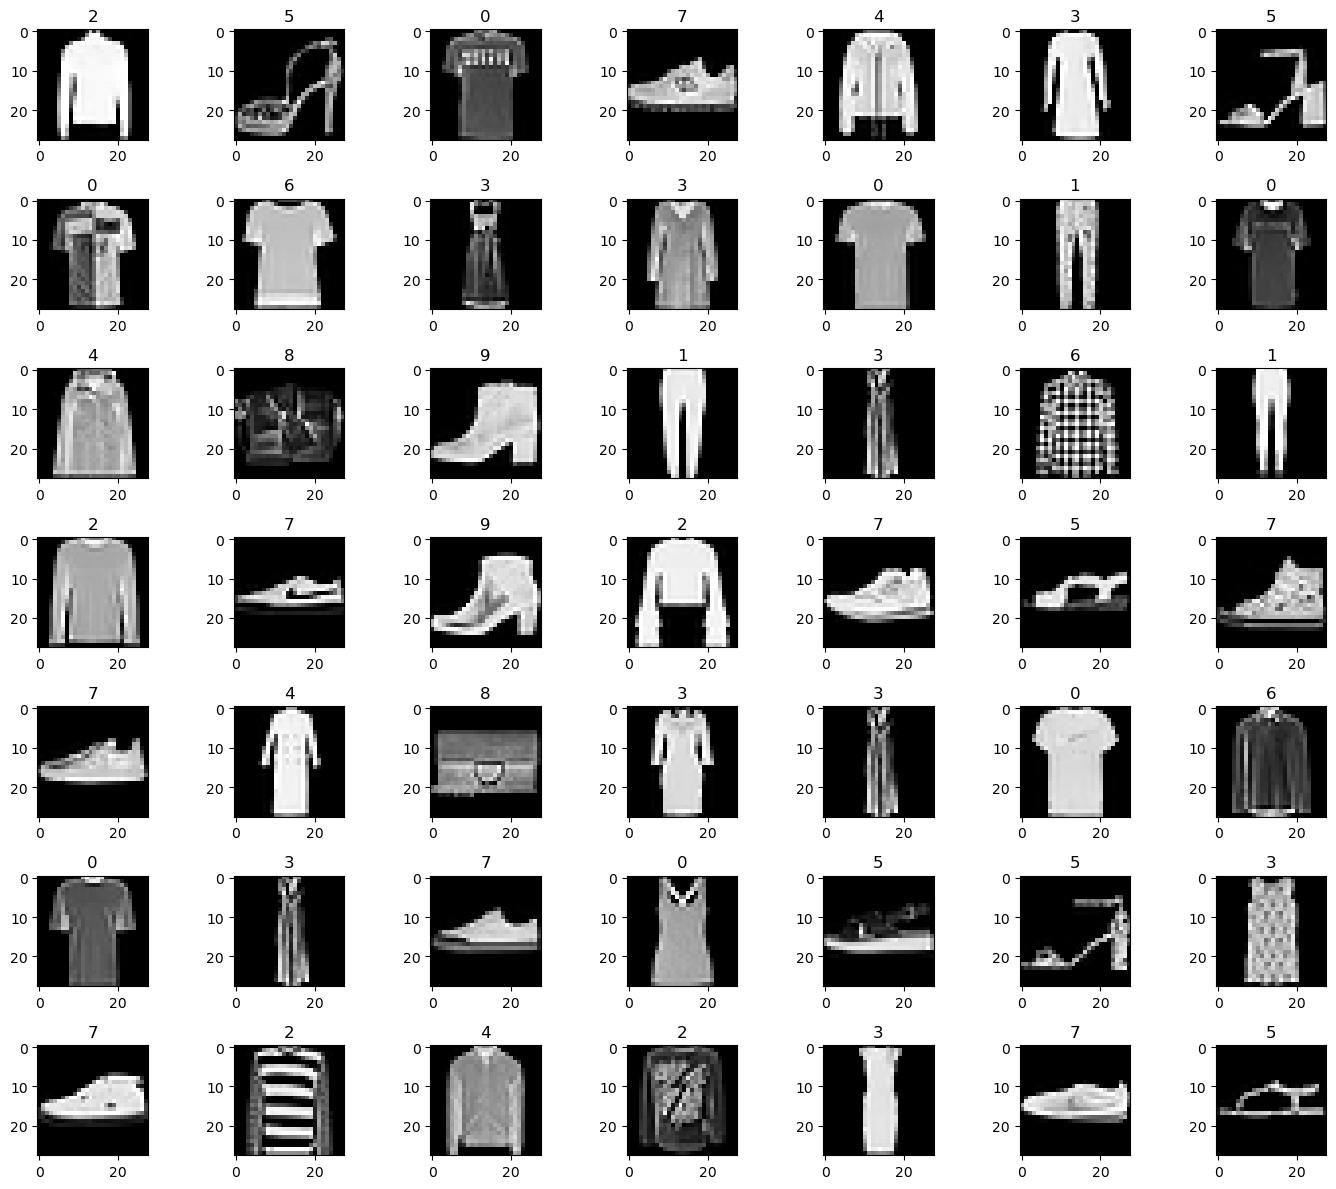

In [10]:
# Getting random image
plt.figure(figsize=(14,12))
for i in range(1,50):
    fig = plt.subplot(7,7,i)
    ch = np.random.randint(0,200)
    img = np.reshape(X.iloc[ch],(28,28))
    fig.imshow(img, cmap="grey")
    fig.set_title(y.iloc[ch])
plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Reshape, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import SparseCategoricalCrossentropy
import keras_tuner as kt

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,X_valid.shape

((38400, 784), (12000, 784), (9600, 784))

In [57]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Reshape((28, 28, 1)))  # Note the reshaping to (28, 28, 1)
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), activation="relu", padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), activation="relu", padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), activation="relu", padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation="softmax"))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 50)          │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 28, 28, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 28, 28, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 28, 28, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 39200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       5,017,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,072,234 (19.35 MB)

 Trainable params: 5,072,234 (19.35 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer="adam", metrics=["accuracy"],loss="sparse_categorical_crossentropy")

In [61]:
batch_size = X_train.shape[0]//100

In [65]:
earlyStop = EarlyStopping(monitor="val_loss",patience=5,min_delta=0.05)
model.fit(X_train,y_train, validation_data=(X_valid,y_valid),
          batch_size=batch_size, initial_epoch=0,epochs=100,
          callbacks=[earlyStop], verbose=1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.5670 - loss: 1.2445 - val_accuracy: 0.7992 - val_loss: 0.5746
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7632 - loss: 0.6916 - val_accuracy: 0.8451 - val_loss: 0.4431
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8011 - loss: 0.5752 - val_accuracy: 0.8519 - val_loss: 0.4065
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.8246 - loss: 0.5052 - val_accuracy: 0.8692 - val_loss: 0.3702
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.8345 - loss: 0.4618 - val_accuracy: 0.8807 - val_loss: 0.3451
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8485 - loss: 0.4279 - val_accuracy: 0.8796 - val_loss: 0.3414
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8557 - loss: 0.3980 - val_accuracy: 0.8861 - val_loss: 0.3263
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8600 - loss: 0.3832 - 

In [67]:
y_pred = model.predict(X_test)
y_pred[0]

375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step


array([2.9313423e-09, 5.5342756e-16, 5.5892261e-12, 4.2917436e-10,
       5.2628017e-09, 6.5017809e-07, 3.6129147e-10, 9.9997783e-01,
       9.1162600e-10, 2.1544885e-05], dtype=float32)

In [68]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 8, 8, ..., 9, 5, 5], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

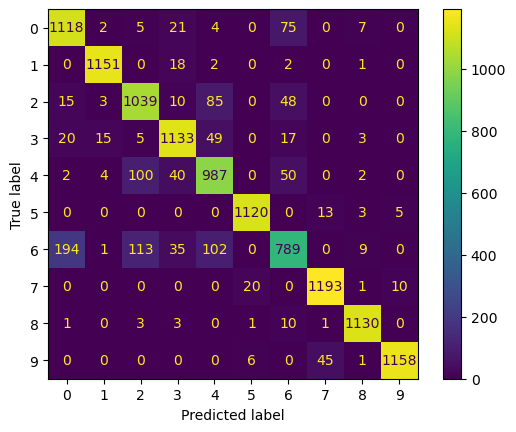

In [74]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()